# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Aaron Gillespie

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [45]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.9.0
appnope                   0.1.4
argon2-cffi               25.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
blis                      1.3.0
catalogue                 2.0.10
certifi                   2025.6.15
cffi                      1.17.1
charset-normalizer        3.4.2
click                     8.2.1
cloudpathlib              0.21.1
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.2
cycler                    0.12.1
cymem                     2.0.11
debugpy                   1.8.14
decorator                 5.2.1
defusedxml                0.7.1
en_core_web_sm            3.8.0
executing     

## Question 1

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [46]:
# Fetch the article HTML from the specified URL
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
response = requests.get(url)
full_page = response.text

print(full_page[:500])


<!DOCTYPE html>
<html itemscope="itemscope" itemtype="http://schema.org/Article" lang="en-US">
<head><script type="text/javascript" src="https://web-static.archive.org/_static/js/bundle-playback.js?v=1B2M2Y8A" charset="utf-8"></script>
<script type="text/javascript" src="https://web-static.archive.org/_static/js/wombat.js?v=1B2M2Y8A" charset="utf-8"></script>
<script>window.RufflePlayer=window.RufflePlayer||{};window.RufflePlayer.config={"autoplay":"on","unmuteOverlay":"hidden","showSwfDownload"


In [47]:
# Grab the article tag from the HTML
soup = BeautifulSoup(full_page, "html.parser")
article_tag = soup.find("article")
if article_tag:
    article = str(article_tag)
else:
    print("Article tag not found.")

print(article[:500])

<article class="post-466450 post type-post status-publish format-standard has-post-thumbnail hentry category-car-hacks category-engineering category-featured category-laser-hacks category-slider tag-laser tag-laser-headlight tag-laser-headlights tag-light" id="post-466450" itemscope="" itemtype="http://schema.org/Article">
<header class="entry-header">
<h1 class="entry-title" itemprop="name">How Laser Headlights Work</h1>
<div class="entry-meta">
<a class="comments-counts" href="https://web.arch


In [48]:
with open("fetched_article.pkl", "wb") as f:
    pickle.dump(article, f)

## Question 2

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [49]:
with open("fetched_article.pkl", "rb") as f:
    article_html = pickle.load(f)

soup = BeautifulSoup(article_html, "html.parser")
article_text = soup.get_text()
print(article_text)



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

## Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [50]:
# Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")
# Process the article text
doc = nlp(article_text)

# Define a function to be more explicit about which tokens we care about
def is_character_we_care_about(token):
    return not token.is_stop and not token.is_punct and not token.is_space

# Count the frequency of tokens, excluding stop words and punctuation
token_freq = Counter(token.text.lower() for token in doc if is_character_we_care_about(token))

# Get the 5 most common tokens
common_tokens = token_freq.most_common(5)

# Print the common tokens with their frequencies
print("Most common tokens:")
for token, freq in common_tokens:
    print(f"Token: {token}, Frequency: {freq}") 


Most common tokens:
Token: laser, Frequency: 35
Token: headlights, Frequency: 19
Token: headlight, Frequency: 11
Token: technology, Frequency: 10
Token: led, Frequency: 10


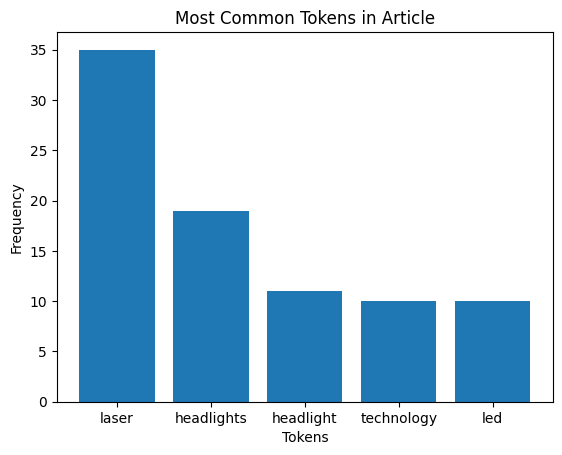

In [51]:
# Plot the frequencies of the most common tokens
tokens, frequencies = zip(*common_tokens)
plt.bar(tokens, frequencies)
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Most Common Tokens in Article')
plt.show()

## Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [52]:
# Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")
# Process the article text
doc = nlp(article_text)
# Count the frequency of tokens, excluding stop words and punctuation
token_freq = Counter(token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space)    
# Get the 5 most common lemmas
lemma_freq = Counter(token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space)
common_lemmas = lemma_freq.most_common(5)   
# Print the common lemmas with their frequencies
print("Most common lemmas:")
for lemma, freq in common_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}")

Most common lemmas:
Lemma: laser, Frequency: 40
Lemma: headlight, Frequency: 28
Lemma: beam, Frequency: 12
Lemma: technology, Frequency: 10
Lemma: led, Frequency: 10


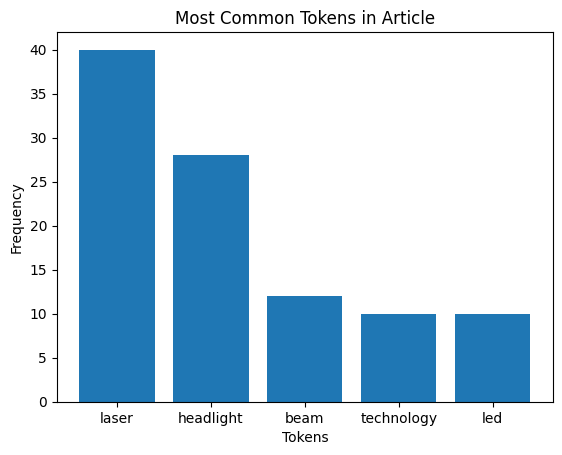

In [53]:
# Plot the frequencies of the most common tokens
lemma, frequencies = zip(*common_lemmas)
plt.bar(lemma, frequencies)
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Most Common Tokens in Article')
plt.show()

## Question 5
5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [54]:
# Define functions to score sentences based on tokens
def score_sentence_by_token(sentence, interesting_tokens):
    """Score a sentence based on the presence of interesting tokens."""
    words = [token.text.lower() for token in nlp(sentence) if not token.is_stop and not token.is_punct and not token.is_space]
    if not words:
        return 0
    return sum(1 for word in words if word in interesting_tokens) / len(words)

# Define functions to score sentences based on lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    """Score a sentence based on the presence of interesting lemmas."""
    words = [token.lemma_.lower() for token in nlp(sentence) if not token.is_stop and not token.is_punct and not token.is_space]
    if not words:
        return 0
    return sum(1 for word in words if word in interesting_lemmas) / len(words)
interesting_tokens = [token for token, _ in common_tokens]
interesting_lemmas = [lemma for lemma, _ in common_lemmas]
# Example sentences to score
sentences = [
    "When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind."
    "Laser headlights are fascinating.",
    "The technology behind laser headlights is complex.",
    "I love the way laser headlights look at night.",
    "This article explains how laser headlights work.",
    "Laser headlights are not just a trend; they are the future of automotive lighting."
]
# Score each sentence by token and lemma
for sentence in sentences:
    token_score = score_sentence_by_token(sentence, interesting_tokens)
    lemma_score = score_sentence_by_lemma(sentence, interesting_lemmas)
    print(f"Sentence: {sentence}")
    print(f"Token Score: {token_score:.2f}, Lemma Score: {lemma_score:.2f}\n")  

Sentence: When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.Laser headlights are fascinating.
Token Score: 0.31, Lemma Score: 0.31

Sentence: The technology behind laser headlights is complex.
Token Score: 0.75, Lemma Score: 0.75

Sentence: I love the way laser headlights look at night.
Token Score: 0.33, Lemma Score: 0.33

Sentence: This article explains how laser headlights work.
Token Score: 0.40, Lemma Score: 0.40

Sentence: Laser headlights are not just a trend; they are the future of automotive lighting.
Token Score: 0.33, Lemma Score: 0.33



## Question 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Number of sentences in the article: 56

Sentence with token score 1:
Laser Headlights?!



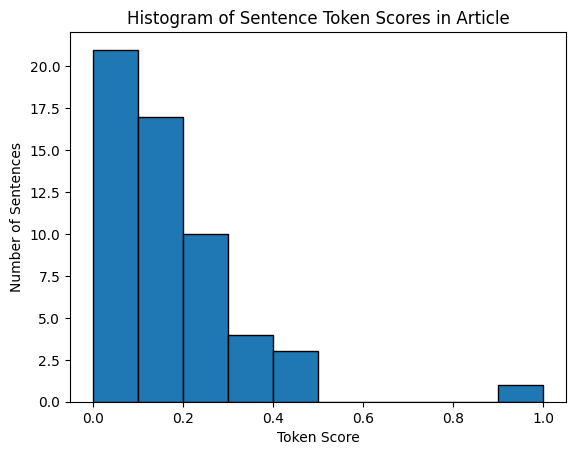

In [55]:
# Split the article text into sentences using spaCy
doc = nlp(article_text)
article_sentences = [sent.text for sent in doc.sents]
print(f"Number of sentences in the article: {len(article_sentences)}\n")
# Calculate token scores for each sentence
sentence_token_scores = [score_sentence_by_token(sentence, interesting_tokens) for sentence in article_sentences]

# Print sentences with a token score of 1
for sentence, score in zip(article_sentences, sentence_token_scores):
    if score == 1:
        print("Sentence with token score 1:")
        print(sentence)

# Plot histogram of token scores
plt.hist(sentence_token_scores, bins=10, edgecolor='black')
plt.xlabel('Token Score')
plt.ylabel('Number of Sentences')
plt.title('Histogram of Sentence Token Scores in Article')
plt.show()

# Most common range of scores appears to be 0.0 to 0.1 (based on histogram). 
# Also I found the single more interesting sentence with a token score of 1 was simply "Laser Headlights?!"

## Question 7

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Number of sentences in the article: 56



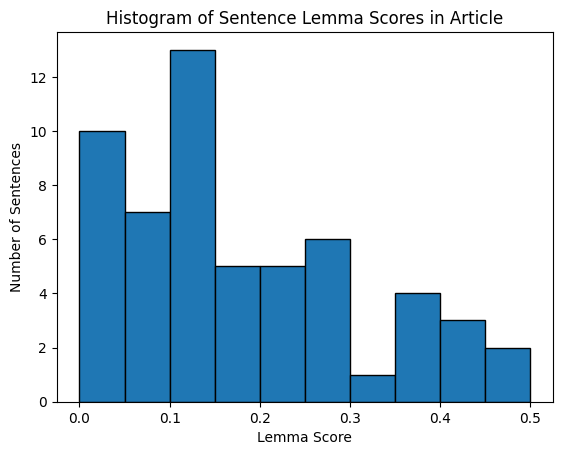

In [ ]:
# Split the article text into sentences using spaCy
doc = nlp(article_text)
article_sentences = [sent.text for sent in doc.sents]
print(f"Number of sentences in the article: {len(article_sentences)}\n")

# Calculate lemma scores for each sentence
sentence_lemma_scores = [score_sentence_by_lemma(sentence, interesting_lemmas) for sentence in article_sentences]

# Print sentences with a lemma score of 1
for sentence, score in zip(article_sentences, sentence_lemma_scores):
    if score == 1:
        print("Sentence with lemma score 1:")
        print(sentence)

# Plot histogram of lemma scores
plt.hist(sentence_lemma_scores, bins=10, edgecolor='black')
plt.xlabel('Lemma Score')
plt.ylabel('Number of Sentences')
plt.title('Histogram of Sentence Lemma Scores in Article')
plt.show()

# Most common range of scores appears to be 0.1 to 0.15 (based on histogram).

## Question 8

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns?

### Answer 8

If we only wanted to consider *nouns*, we'd be ignoring tokens like "think", "march", and "come" (from the first sentence alone). If we wanted to factor nouns (like those) out of our considerations, we could utilize spaCy's **parts-of-speach** (POS) tagging feature. This is the only *obvious* way to accomplish the task, but like in all things coding, there's 100 other ways you could go about tackling the problem. In this case, though, I'd use the built-in methods afforded to me by the spaCy library.

The code itself would include something that looks similar to this:

```python
for token in doc:
        if token.pos_ == "NOUN":
            # Your logic for what makes a noun "interesting"
            score += get_interest_score(token)
```